In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Dataset_2.zip' -d '/content/DB'

Streaming output truncated to the last 5000 lines.
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1919_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1920_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1922_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1923_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1924_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1925_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1928_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1929_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_11_0916_1986_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01_0001_0_12_0916_1904_29.png  
  inflating: /content/DB/BanglaLekha-Isolated/Images/029/01

In [ ]:
dataset_path = '/content/DB/BanglaLekha-Isolated/Images'

In [ ]:
IMG_SIZE = 32
images = []
labels = []

In [ ]:
for folder in sorted(os.listdir(dataset_path)):  # Sort to ensure consistent label mapping
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder}")
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Resize and normalize the image
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(int(folder))

Processing folder: 001
Processing folder: 002
Processing folder: 003
Processing folder: 004
Processing folder: 005
Processing folder: 006
Processing folder: 007
Processing folder: 008
Processing folder: 009
Processing folder: 010
Processing folder: 011
Processing folder: 012
Processing folder: 013
Processing folder: 014
Processing folder: 015
Processing folder: 016
Processing folder: 017
Processing folder: 018
Processing folder: 019
Processing folder: 020
Processing folder: 021
Processing folder: 022
Processing folder: 023
Processing folder: 024
Processing folder: 025
Processing folder: 026
Processing folder: 027
Processing folder: 028
Processing folder: 029
Processing folder: 030
Processing folder: 032
Processing folder: 034
Processing folder: 038


In [ ]:
images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0  # Normalize to [0, 1]
labels = np.array(labels)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Verify dataset
print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Testing samples: {len(X_test)}")
print(f"Classes (Bangla Characters): {label_encoder.classes_}")

Training samples: 30220, Validation samples: 3777, Testing samples: 3778
Classes (Bangla Characters): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 34 38]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

In [ ]:
model = Sequential([
    Input(shape=(32, 32, 1)),  # Explicit Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(34, activation='softmax')  # 34 output classes
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/25
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.2318 - loss: 2.7559 - val_accuracy: 0.7130 - val_loss: 0.9684
Epoch 2/25
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6258 - loss: 1.1764 - val_accuracy: 0.7972 - val_loss: 0.6813
Epoch 3/25
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7090 - loss: 0.9147 - val_accuracy: 0.8329 - val_loss: 0.5561
Epoch 4/25
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7514 - loss: 0.7710 - val_accuracy: 0.8552 - val_loss: 0.4920
Epoch 5/25
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7802 - loss: 0.6888 - val_accuracy: 0.8631 - val_loss: 0.4544
Epoch 6/25
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7977 - loss: 0.6435 - val_accuracy: 0.8689 - val_loss: 0.4398
Epoch 7/25
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8119 - loss: 0.5821 - val_accuracy: 0.8745 - val_loss: 0.4047
Epoch 8/25
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8287 - loss: 0.5546 - val_accuracy: 

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9099 - loss: 0.3041
Test Accuracy: 90.79%


In [ ]:
model.save('bangla_character_classifier.keras')

Saving 1.png to 1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


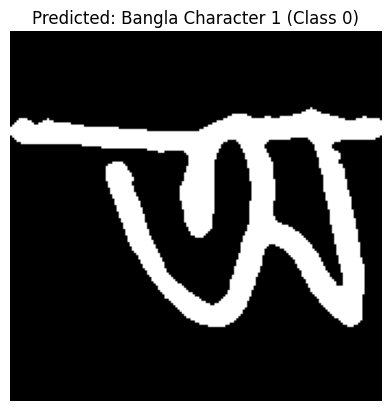

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
import io
import os

model_path = "bangla_character_classifier.keras"
model = tf.keras.models.load_model(model_path)

class_map = {i: f"Bangla Character {i+1}" for i in range(34)}

# Function to preprocess uploaded image
def preprocess_uploaded_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img_resized = cv2.resize(img, (32, 32))  # Resize to 32x32
    _, img_thresholded = cv2.threshold(img_resized, 127, 255, cv2.THRESH_BINARY)  # Apply thresholding
    img_normalized = img_thresholded / 255.0  # Normalize
    img_reshaped = img_normalized.reshape(1, 32, 32, 1)  # Reshape for the model
    return img_reshaped

# Function to upload and predict
def upload_and_predict():
    # Use google.colab.files to handle uploads
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Read the uploaded image
        # Save the uploaded file to a temporary location
        with open(fn, 'wb') as f:
            f.write(uploaded[fn])
        file_path = fn  # Use the filename as the path
        img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_GRAYSCALE)
        # Preprocess the uploaded image
        processed_image = preprocess_uploaded_image(file_path)

        # Predict the class
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        predicted_label = class_map[predicted_class]

        # Display the uploaded image and prediction
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {predicted_label} (Class {predicted_class})")
        plt.axis('off')
        plt.show()
        # Remove the temporary file after processing
        os.remove(fn)
# Run the system
upload_and_predict()